# Módulo Imágen fotográfica a imágen interpretada - dibujada. PAISAJE

Este módulo de código esta modificado por mi sustituyendo e incluyendo mis propias imágenes y está basado en el código https://www.kaggle.com/code/koklengyeo/casting-phoebe-in-style Casting Phoebe in Style Python · Phoebe · This Notebook has been released under the Apache 2.0 open source license.

# Índice
- [ 1 - Importar Librerías 
- [ 2 - Funciones auxiliares
- [3 - Carga el modelo el contenido y los estilos
- [4 - Transferencia de estilos

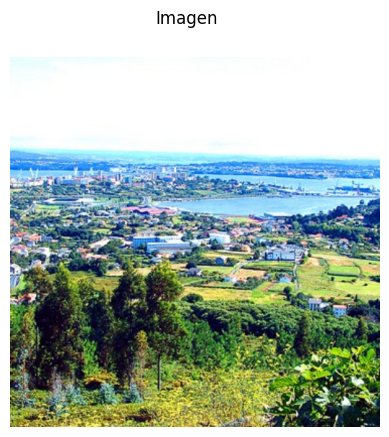

In [1]:

import io
import sys
sys.stdout=io.StringIO()

#Eliminar warnings
import warnings
warnings.filterwarnings("ignore")

#Importar librerías
from functools import lru_cache
from matplotlib import gridspec
import matplotlib.pylab as plt
import numpy as np
import os
import tensorflow as tf
import tensorflow_hub as hub
import validators

#Función - encontrar el centro
def crop(image):
  _=image.shape
  height,width=_[1],_[2]
  _=min(height,width)
  target_height,target_width=_,_
  offset_height=max(height-width,0)//2
  offset_width=max(width-height,0)//2
  image_crop=tf.image.crop_to_bounding_box(
      image,offset_height,offset_width,target_height,target_width)
  return image_crop

#Función - Cargar imagenes
@lru_cache(maxsize=None)
def load_image(source):
  #DOWNLOAD (IF URL)
  if validators.url(source):
    _=tf.keras.utils.get_file(os.path.basename(source),source)
  else:
    _=source
  #Decode
  image=tf.io.decode_image(tf.io.read_file(_),channels=3,dtype=tf.float32)
  #BATCH Dimensión
  image=image[tf.newaxis,...]
  #Centro
  image=crop(image)
  #Redimensionado
  image=tf.image.resize(image,(512,512))
  return image

#Función - Grafiar
def image_plot(images,title,grid):
  n=len(images)
  plt.figure()
  gs=gridspec.GridSpec(grid[0],grid[1])
  for i in range(n):
    plt.subplot(gs[i])
    plt.imshow(images[i])
    plt.axis('off')
  plt.suptitle(title)
  plt.show()

#Imagen de Contenido
path_c='V1.jpg'
content=load_image(path_c)
image_plot(content,"Imagen",(1,1))

El código realiza varias funciones relacionadas con la carga y preprocesamiento de imágenes, así como la visualización de las mismas. Aquí está la explicación detallada:

Importamos varias bibliotecas necesarias para el procesamiento de imágenes, incluyendo TensorFlow y TensorFlow Hub para cargar y procesar modelos pre-entrenados, y Matplotlib para visualización de imágenes.
Definición de funciones para cargar y visualizar imágenes:

crop(image): Esta función recorta una imagen cuadrada centrada a partir de una imagen rectangular. Se utiliza para garantizar que las imágenes tengan las mismas dimensiones antes de ser procesadas.

load_image(source): Esta función carga y preprocesa una imagen, la convierte en un tensor de tipo float32, la redimensiona y la normaliza.

image_plot(images,title,grid): Utiliza esta función para mostrar la imagen de contenido y las imagenes de estilo con sus respectivos títulos.

 path_c='V1.jpg' Variable que contiene la carpeta y nombre de la imagen a modificar,

content=load_image() Carga la imagen aplicando la función descrita.

 i_style=load_image(i) A través de un bucle y la función load_image, carga las imágenes que van a servir para la transferencia de estilo. En este caso utilizouna pintura mía, al primera, otra de mi tío, otra de mi primos y 3 imágenes obtenidas de img2go.

Explicación detallada sobre TensorFlow y TensorFlow Hub:

TensorFlow:

Desarrollador y Uso: TensorFlow es una biblioteca de código abierto desarrollada por Google Brain Team para realizar cálculos numéricos eficientes y crear modelos de aprendizaje automático, especialmente redes neuronales. Se utiliza ampliamente en investigación y producción para una variedad de tareas de aprendizaje automático y procesamiento de datos, como clasificación de imágenes, procesamiento de lenguaje natural, y más.
Características y Funcionalidades: TensorFlow proporciona una interfaz de programación flexible y extensible que permite a los desarrolladores crear y entrenar modelos de aprendizaje automático de manera eficiente. Ofrece características como gráficos computacionales para definir y ejecutar operaciones matemáticas, optimizadores para entrenar modelos, y una variedad de herramientas y bibliotecas adicionales para simplificar el desarrollo de modelos de aprendizaje automático.
Usos Comunes: TensorFlow se utiliza en una amplia gama de aplicaciones, desde investigación en inteligencia artificial hasta desarrollo de productos comerciales. Es especialmente popular en la comunidad de aprendizaje automático debido a su flexibilidad, escalabilidad y soporte para una variedad de dispositivos y plataformas, incluyendo CPUs, GPUs y TPUs.
TensorFlow Hub:

Desarrollador y Uso: TensorFlow Hub es una biblioteca desarrollada por Google que proporciona una plataforma para compartir, descubrir y reutilizar módulos pre-entrenados de aprendizaje profundo. Estos módulos, también conocidos como "módulos de TensorFlow Hub", son modelos de aprendizaje automático pre-entrenados y componentes reutilizables que pueden ser utilizados para tareas específicas de procesamiento de datos, como la clasificación de imágenes, la extracción de características y la transferencia de estilo.
Características y Funcionalidades: TensorFlow Hub simplifica el proceso de integración de modelos pre-entrenados en aplicaciones de aprendizaje automático al proporcionar una interfaz unificada y fácil de usar para buscar y descargar módulos, así como para utilizarlos en código. Los módulos de TensorFlow Hub son compatibles con TensorFlow y se pueden cargar y utilizar directamente en modelos personalizados.
Usos Comunes: TensorFlow Hub se utiliza en una variedad de aplicaciones de aprendizaje automático para acelerar el desarrollo y mejorar el rendimiento de los modelos. Los usuarios pueden aprovechar los módulos pre-entrenados disponibles en TensorFlow Hub para tareas comunes de procesamiento de datos, como la clasificación de imágenes con modelos como Inception, la detección de objetos con modelos como SSD, y la generación de texto con modelos de lenguaje natural como BERT. Además, los usuarios también pueden contribuir con sus propios módulos pre-entrenados a TensorFlow Hub para compartir sus avances y contribuir a la comunidad de aprendizaje automático.

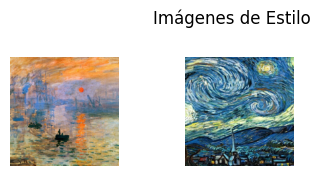

In [2]:
#Imágenes de estilo
style_url=[
    "s1.jpg",
    "s2.jpg"
    ]
for i in style_url:
  i_style=load_image(i)
  if i==style_url[0]:
    style=i_style
  else:
    style=tf.concat([style,i_style],axis=0)
image_plot(style,"Imágenes de Estilo",(3,3))

In [3]:
#Carga desde kaggle el modelo de GOOGLE Variacion 256 versión 2
_="https://www.kaggle.com/models/google/arbitrary-image-stylization-v1/frameworks/TensorFlow1/variations/256/versions/2"
style_transfer_model=hub.load(_)



Este segundo paso del código implica cargar un módulo de TensorFlow Hub y utilizarlo para estilizar una imagen de contenido con una imagen de estilo. Aquí está la explicación detallada:

Carga del Módulo de TensorFlow Hub:

url_m: Esta variable contiene la URL del módulo de TensorFlow Hub que se va a cargar. En este caso, el módulo es "Arbitrary Image Stylization" de Magenta, que permite estilizar imágenes con un estilo dado.

style_transfer_model:Esta variable carga en la memoria el módulo del modelo, utilizando la función hub.load(). Este módulo contiene el modelo pre-entrenado necesario para realizar la transferencia de estilo.

Cast: Se utiliza el módulo cargado para estilizar la imagen de contenido (content) con las imagenes de estilo (style). El método tf.constant() se utiliza para convertir las imágenes cargadas en tensores constantes de TensorFlow antes de pasarlas al módulo de TensorFlow Hub.

En resumen, este paso del código carga un módulo pre-entrenado de TensorFlow Hub que se utiliza para estilizar una imagen de contenido con las imagenes de estilo específicas. Este proceso es bastante rápido, especialmente cuando se ejecuta en una GPU, y proporciona una manera eficiente de aplicar efectos de estilo a las imágenes.

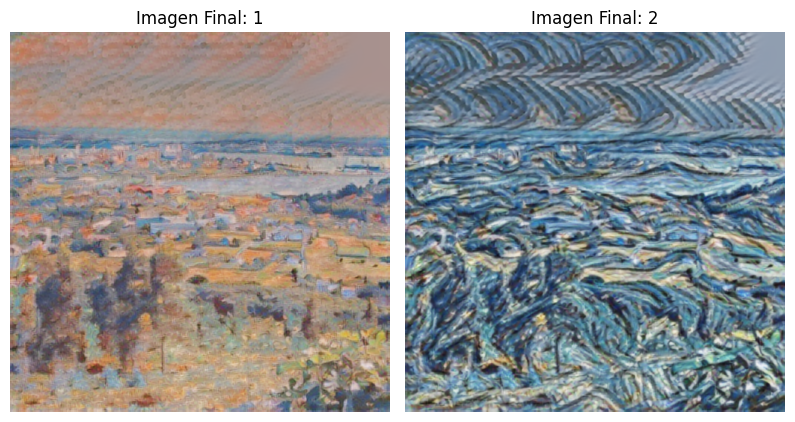

In [4]:
# Transferencia de Estilos
stylized_images = []
for i, style_image in enumerate(style_url):
    style_image = load_image(style_image)
    stylized_image = style_transfer_model(content, style_image)
    stylized_images.append(stylized_image[0])

# Muestra y graba todas las imágenes
def plot_all_stylized_images(stylized_images, style_urls):
    num_styles = len(stylized_images)
    num_rows = (num_styles + 2) // 3 
    plt.figure(figsize=(12, 8))
    for i, stylized_image in enumerate(stylized_images):
       
        stylized_image = np.array(stylized_image[0])
        plt.subplot(num_rows, 3, i + 1)
        plt.imshow(stylized_image)
        plt.title(f"Imagen Final: {i + 1}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

plot_all_stylized_images(stylized_images, style_url)
